In [605]:
# using keras or tensorflow to classify the groups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [606]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [607]:
train_df.isna().any()


ID                 False
Sex                 True
Bachelor            True
Age                 True
Graduated           True
Career              True
Work Experience     True
Family Expenses     True
Family  Size        True
Variable            True
Segmentation       False
Description        False
dtype: bool

In [608]:
train_df.Sex.unique()

array(['Male', 'Female', nan], dtype=object)

In [609]:
# hot encoding male and female values

train_df["Sex"] = train_df['Sex'].replace({'Male': int(0), 'Female': int(1)})
test_df["Sex"] = test_df['Sex'].replace({'Male': int(0), 'Female': int(1)})

C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\1910057600.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["Sex"] = train_df['Sex'].replace({'Male': int(0), 'Female': int(1)})
C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\1910057600.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["Sex"] = test_df['Sex'].replace({'Male': int(0), 'Female': int(1)})


In [610]:
train_df.head()

,ID,Sex,Bachelor,Age,Graduated,Career,Work Experience,Family Expenses,Family Size,Variable,Segmentation,Description
0,1462220581,0.0,No,41.0,Yes,Fashion Designer,2.0,Low,3,Dog_6,Akshat,The specimen is reliable and experienced.
1,1462220232,1.0,Yes,38.0,Yes,HR,0.0,Average,2,Dog_6,Akshat,The specimen is reliable and experienced.
2,1462226544,0.0,Yes,41.0,Yes,Fashion Designer,0.0,High,5,Dog_6,Bhavesh,The specimen is reliable and experienced.
3,1462224171,0.0,No,21.0,No,Doctor,0.0,Low,4,Dog_6,Darsh,The specimen is responsible and hardworking.
4,1462226427,1.0,No,37.0,Yes,Fashion Designer,0.0,Low,1,Dog_2,Bhavesh,The specimen is reliable and experienced.


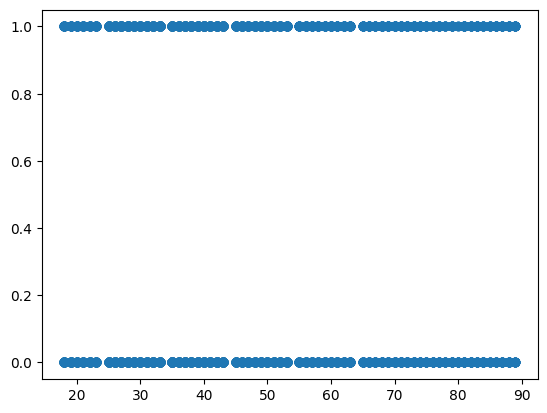

In [611]:
plt.scatter(train_df['Age'], train_df['Sex'])
plt.show()

##### Inference is almost equal proportion of male and female in the age groups slightly from age of 63 to 90 males are more by approx(2-5%)

In [612]:
# hence randomizing the variable of male and female and replacing it with the na values
import random

train_df['Sex'].fillna(random.choice([0,1]), inplace=True)
test_df['Sex'].fillna(random.choice([0,1]), inplace=True)

C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\902380505.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Sex'].fillna(random.choice([0,1]), inplace=True)
C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\902380505.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [613]:
train_df['Sex'].isna().any()
train_df.head()

,ID,Sex,Bachelor,Age,Graduated,Career,Work Experience,Family Expenses,Family Size,Variable,Segmentation,Description
0,1462220581,0.0,No,41.0,Yes,Fashion Designer,2.0,Low,3,Dog_6,Akshat,The specimen is reliable and experienced.
1,1462220232,1.0,Yes,38.0,Yes,HR,0.0,Average,2,Dog_6,Akshat,The specimen is reliable and experienced.
2,1462226544,0.0,Yes,41.0,Yes,Fashion Designer,0.0,High,5,Dog_6,Bhavesh,The specimen is reliable and experienced.
3,1462224171,0.0,No,21.0,No,Doctor,0.0,Low,4,Dog_6,Darsh,The specimen is responsible and hardworking.
4,1462226427,1.0,No,37.0,Yes,Fashion Designer,0.0,Low,1,Dog_2,Bhavesh,The specimen is reliable and experienced.


In [614]:
train_df.Career.unique()

array(['Fashion Designer', 'HR', 'Doctor', 'Lawyer', nan, 'Scientist',
       'Singer', 'Content Creation', 'Housewife'], dtype=object)

C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\3332167143.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Bachelor'] = train_df['Bachelor'].replace({"Yes": 1, "No": 0})
C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\3332167143.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Bachelor'] = test_df['Bachelor'].replace({"Yes": 1, "No": 0})


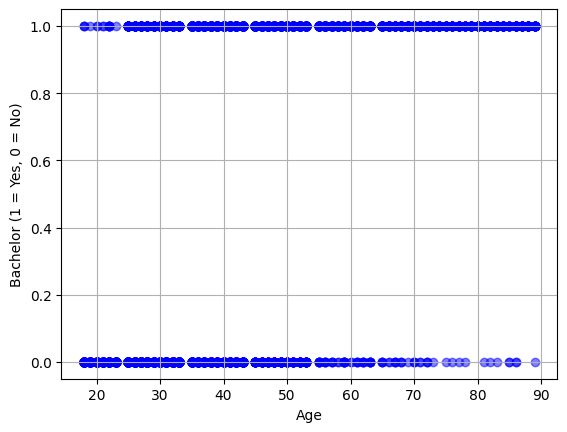

In [615]:
train_df['Bachelor'] = train_df['Bachelor'].replace({"Yes": 1, "No": 0})
test_df['Bachelor'] = test_df['Bachelor'].replace({"Yes": 1, "No": 0})

plt.scatter(train_df['Age'], train_df['Bachelor'], alpha=0.5, color='blue')
plt.xlabel('Age')
plt.ylabel('Bachelor (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()

In [616]:
x_train = train_df.loc[train_df['Bachelor'].notna(), ['Age']]
y_train = train_df.loc[train_df['Bachelor'].notna(), 'Bachelor']
x_test = train_df.loc[train_df['Bachelor'].isna(), ['Age']]

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

if x_test.empty:
    print("No NaN values in 'Bachelor' to predict.")
else:
    yp = rf.predict(x_test)
    train_df.loc[train_df['Bachelor'].isna(), 'Bachelor'] = yp
train_df['Bachelor'].isna().any()


False

In [617]:
x_test_1 = test_df.loc[test_df['Bachelor'].notna(), ['Age']]
y_test_1 = test_df.loc[test_df['Bachelor'].notna(), 'Bachelor']
x_test_2 = test_df.loc[test_df['Bachelor'].isna(), ['Age']]

rf2 = RandomForestClassifier()
rf2.fit(x_test_1, y_test_1)

if x_test_2.empty:
    print("No NaN values in 'Bachelor' to predict.")
else:
    yp = rf2.predict(x_test_2)
    test_df.loc[test_df['Bachelor'].isna(), 'Bachelor'] = yp
test_df['Bachelor'].isna().any()


False

In [618]:
train_df.isna().any()

ID                 False
Sex                False
Bachelor           False
Age                 True
Graduated           True
Career              True
Work Experience     True
Family Expenses     True
Family  Size        True
Variable            True
Segmentation       False
Description        False
dtype: bool

In [619]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True) # for the distribution spread
test_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\2920057110.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace = True) # for the distribution spread
C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\2920057110.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\1890972292.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Graduated'] = train_df['Graduated'].replace({"Yes": 1, "No": 0})
C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\1890972292.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Graduated'] = test_df['Graduated'].replace({"Yes": 1, "No": 0})


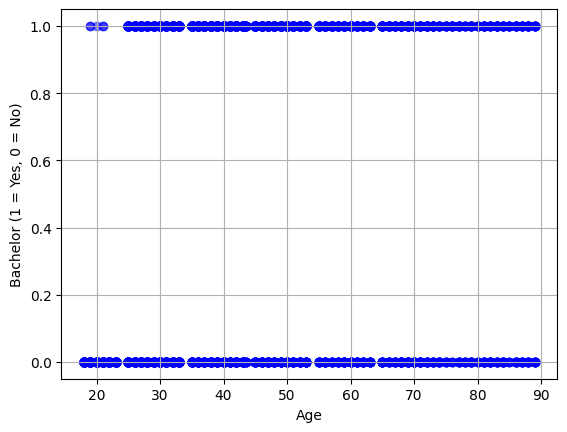

In [620]:
train_df['Graduated'] = train_df['Graduated'].replace({"Yes": 1, "No": 0})
test_df['Graduated'] = test_df['Graduated'].replace({"Yes": 1, "No": 0})

plt.scatter(train_df['Age'], train_df['Graduated'], alpha=0.5, color='blue')
plt.xlabel('Age')
plt.ylabel('Bachelor (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()

In [621]:
# so anybody below 25 has not graduated 
train_df['Graduated'] = np.where(train_df['Age'] <= 25, 0, 1)
test_df['Graduated'] = np.where(test_df['Age'] <= 25, 0, 1)

train_df.Graduated.isna().any()

False

In [622]:
train_df.drop('Career', axis=1, inplace=True)
test_df.drop('Career', axis=1, inplace=True)

In [623]:
train_df['Work Experience'].value_counts()

Work Experience
1.0     1684
0.0     1599
9.0      334
8.0      331
2.0      195
3.0      185
4.0      173
6.0      143
7.0      136
5.0      126
13.0      36
11.0      34
10.0      34
12.0      32
14.0      32
Name: count, dtype: int64

<Axes: xlabel='Work Experience', ylabel='Age'>

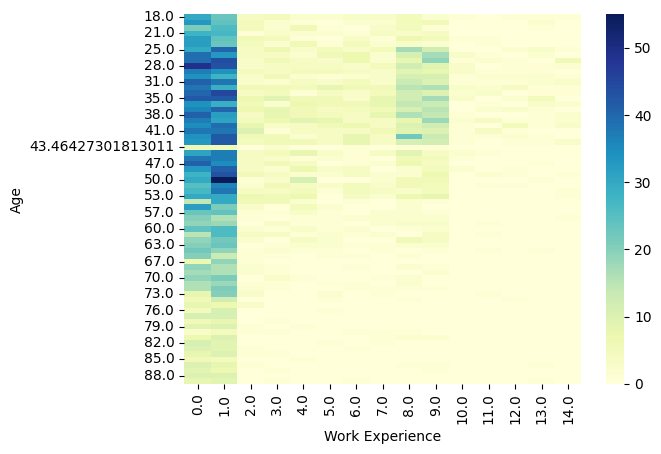

In [624]:
import seaborn as sns
train_df['Graduated'] = train_df['Graduated'].replace({"Yes": 1, "No": 0})

sns.heatmap(pd.crosstab(train_df['Age'], train_df['Work Experience']), cmap="YlGnBu")

In [625]:
# from the heatmap it is clear that most of the people lie between 0-1 year hence to maintain similar distribution filling na values with 0 or 1 year exp

train_df['Work Experience'].fillna(random.choice([0,1]), inplace = True)
test_df['Work Experience'].fillna(random.choice([0,1]), inplace = True)

train_df.isna().any()

C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\2500079839.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Work Experience'].fillna(random.choice([0,1]), inplace = True)
C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\2500079839.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

ID                 False
Sex                False
Bachelor           False
Age                False
Graduated          False
Work Experience    False
Family Expenses     True
Family  Size        True
Variable            True
Segmentation       False
Description        False
dtype: bool

In [626]:
train_df['Family Expenses'].value_counts()
train_df['Family Expenses'] = train_df['Family Expenses'].replace({"Low": 0, "High": 1, "Average": 0.5})
test_df['Family Expenses'] = test_df['Family Expenses'].replace({"Low": 0, "High": 1, "Average": 0.5})

# train_df['Family Expenses'].dtype
train_df

C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\675628206.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Family Expenses'] = train_df['Family Expenses'].replace({"Low": 0, "High": 1, "Average": 0.5})
C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\675628206.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Family Expenses'] = test_df['Family Expenses'].replace({"Low": 0, "High": 1, "Average": 0.5})


,ID,Sex,Bachelor,Age,Graduated,Work Experience,Family Expenses,Family Size,Variable,Segmentation,Description
0,1462220581,0.0,0.0,41.0,1,2.0,0.0,3,Dog_6,Akshat,The specimen is reliable and experienced.
1,1462220232,1.0,1.0,38.0,1,0.0,0.5,2,Dog_6,Akshat,The specimen is reliable and experienced.
2,1462226544,0.0,1.0,41.0,1,0.0,1.0,5,Dog_6,Bhavesh,The specimen is reliable and experienced.
3,1462224171,0.0,0.0,21.0,0,0.0,0.0,4,Dog_6,Darsh,The specimen is responsible and hardworking.
4,1462226427,1.0,0.0,37.0,1,0.0,0.0,1,Dog_2,Bhavesh,The specimen is reliable and experienced.
...,...,...,...,...,...,...,...,...,...,...,...
5642,1462219096,1.0,1.0,48.0,1,1.0,1.0,NaN,Dog_6,Bhavesh,The specimen is reliable and experienced.
5643,1462225855,0.0,0.0,43.0,1,1.0,0.0,NaN,Dog_6,Darsh,The specimen is reliable and experienced.
5644,1462220256,0.0,1.0,42.0,1,9.0,0.0,2,Dog_6,Akshat,The specimen is reliable and experienced.
5645,1462218783,1.0,1.0,27.0,1,0.0,0.0,2,Dog_6,Darsh,The specimen is responsible and hardworking.


In [627]:
train_df['Family Expenses'].fillna(0.5, inplace=True)
test_df['Family Expenses'].fillna(0.5, inplace=True)

C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\2224773130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Family Expenses'].fillna(0.5, inplace=True)
C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\2224773130.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [628]:
# train_df['Family  Size'] = train_df['Family  Size'].astype(float)
train_df['Family Expenses'] = train_df['Family Expenses'].astype(float)

train_df['Family  Size'].value_counts()

train_df.drop(train_df[train_df['Family  Size'] == "\\"].index, axis=0, inplace=True)
test_df.drop(test_df[test_df['Family  Size'] == "\\"].index, axis=0, inplace=True)

# plt.plot(train_df['Family  Size'], train_df['Family Expenses'])
# plt.show()

train_df

,ID,Sex,Bachelor,Age,Graduated,Work Experience,Family Expenses,Family Size,Variable,Segmentation,Description
0,1462220581,0.0,0.0,41.0,1,2.0,0.0,3,Dog_6,Akshat,The specimen is reliable and experienced.
1,1462220232,1.0,1.0,38.0,1,0.0,0.5,2,Dog_6,Akshat,The specimen is reliable and experienced.
2,1462226544,0.0,1.0,41.0,1,0.0,1.0,5,Dog_6,Bhavesh,The specimen is reliable and experienced.
3,1462224171,0.0,0.0,21.0,0,0.0,0.0,4,Dog_6,Darsh,The specimen is responsible and hardworking.
4,1462226427,1.0,0.0,37.0,1,0.0,0.0,1,Dog_2,Bhavesh,The specimen is reliable and experienced.
...,...,...,...,...,...,...,...,...,...,...,...
5642,1462219096,1.0,1.0,48.0,1,1.0,1.0,NaN,Dog_6,Bhavesh,The specimen is reliable and experienced.
5643,1462225855,0.0,0.0,43.0,1,1.0,0.0,NaN,Dog_6,Darsh,The specimen is reliable and experienced.
5644,1462220256,0.0,1.0,42.0,1,9.0,0.0,2,Dog_6,Akshat,The specimen is reliable and experienced.
5645,1462218783,1.0,1.0,27.0,1,0.0,0.0,2,Dog_6,Darsh,The specimen is responsible and hardworking.


<Axes: xlabel='Family Expenses', ylabel='Family  Size'>

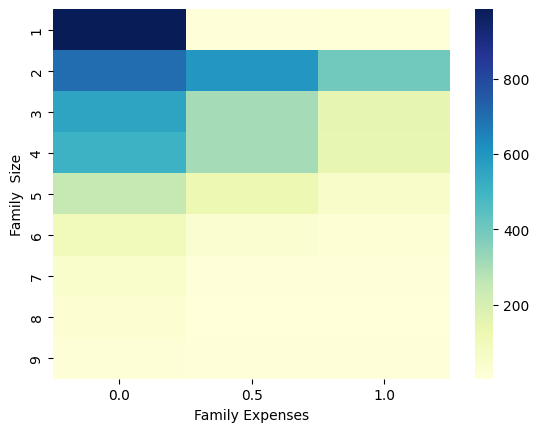

In [629]:
sns.heatmap(pd.crosstab(train_df['Family  Size'], train_df['Family Expenses']), cmap="YlGnBu")

In [630]:
train_df['Family  Size'].value_counts()

train_df['Family  Size'].fillna(2, inplace=True)
test_df['Family  Size'].fillna(2, inplace=True)

C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\135496804.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Family  Size'].fillna(2, inplace=True)
C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\135496804.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [631]:
train_df.isna().any()

ID                 False
Sex                False
Bachelor           False
Age                False
Graduated          False
Work Experience    False
Family Expenses    False
Family  Size       False
Variable            True
Segmentation       False
Description        False
dtype: bool

In [632]:
train_df.Variable.value_counts()
train_df.Variable.fillna("Dog_6", inplace=True)
test_df.Variable.fillna("Dog_6", inplace=True)

train_df['Variable'] = train_df['Variable'].replace({"Dog_1": 0.1, "Dog_2": 0.2, "Dog_3": 0.3, "Dog_4": 0.4, "Dog_5": 0.5, "Dog_6": 0.6, "Dog_7": 0.7})
train_df['Age'] = train_df['Age'] / 100
train_df['Age']

test_df['Variable'] = test_df['Variable'].replace({"Dog_1": 0.1, "Dog_2": 0.2, "Dog_3": 0.3, "Dog_4": 0.4, "Dog_5": 0.5, "Dog_6": 0.6, "Dog_7": 0.7})
test_df['Age'] = test_df['Age'] / 100
test_df['Age']

C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\193259815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.Variable.fillna("Dog_6", inplace=True)
C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\193259815.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

0       0.42
1       0.41
2       0.18
3       0.30
4       0.81
        ... 
2416    0.42
2417    0.89
2418    0.47
2419    0.79
2420    0.84
Name: Age, Length: 2421, dtype: float64

In [633]:
test_df.isna().any()
train_df['Variable'].value_counts()

Variable
0.6    3685
0.4     778
0.3     575
0.2     304
0.7     145
0.1      98
0.5      61
Name: count, dtype: int64

In [634]:
model = RandomForestClassifier()

X = train_df.drop(columns=["Segmentation", "Description", "ID"], axis=1)  
y = train_df["Segmentation"].replace({"Akshat": 1, "Bhavesh": 2, "Chaitanya": 3, "Darsh": 4})              

model.fit(X, y)  


C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\859792611.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = train_df["Segmentation"].replace({"Akshat": 1, "Bhavesh": 2, "Chaitanya": 3, "Darsh": 4})


RandomForestClassifier()

In [635]:
X_2 = test_df.drop(columns=["Description", "ID"], axis=1)
y_pred = model.predict(X_2)



model.score(X_2, y_pred)
y_pred

array([2, 1, 4, ..., 3, 3, 1], dtype=int64)

In [636]:
print(y_pred)
print(model.score(X_2, y_pred))

[2 1 4 ... 3 3 1]
1.0


In [637]:
mapping = {1: 'Akshat', 2: 'Bhavesh', 3: 'Chaitanya', 4: 'Darsh'}
name_arr = [mapping.get(x, x) for x in y_pred]

name_arr

['Bhavesh',
 'Akshat',
 'Darsh',
 'Darsh',
 'Darsh',
 'Darsh',
 'Darsh',
 'Bhavesh',
 'Darsh',
 'Chaitanya',
 'Darsh',
 'Bhavesh',
 'Darsh',
 'Bhavesh',
 'Akshat',
 'Chaitanya',
 'Akshat',
 'Darsh',
 'Akshat',
 'Akshat',
 'Darsh',
 'Darsh',
 'Chaitanya',
 'Akshat',
 'Chaitanya',
 'Bhavesh',
 'Darsh',
 'Akshat',
 'Bhavesh',
 'Darsh',
 'Chaitanya',
 'Bhavesh',
 'Bhavesh',
 'Bhavesh',
 'Akshat',
 'Darsh',
 'Darsh',
 'Akshat',
 'Darsh',
 'Chaitanya',
 'Chaitanya',
 'Darsh',
 'Chaitanya',
 'Bhavesh',
 'Chaitanya',
 'Akshat',
 'Chaitanya',
 'Chaitanya',
 'Chaitanya',
 'Darsh',
 'Darsh',
 'Darsh',
 'Chaitanya',
 'Bhavesh',
 'Bhavesh',
 'Darsh',
 'Darsh',
 'Bhavesh',
 'Darsh',
 'Chaitanya',
 'Bhavesh',
 'Akshat',
 'Chaitanya',
 'Bhavesh',
 'Darsh',
 'Darsh',
 'Darsh',
 'Akshat',
 'Darsh',
 'Akshat',
 'Chaitanya',
 'Bhavesh',
 'Bhavesh',
 'Chaitanya',
 'Darsh',
 'Akshat',
 'Darsh',
 'Akshat',
 'Bhavesh',
 'Darsh',
 'Bhavesh',
 'Akshat',
 'Bhavesh',
 'Chaitanya',
 'Bhavesh',
 'Akshat',
 'Akshat'

In [ ]:
id_col = test_df['ID']

df = pd.DataFrame({'ID': id_col, 'Segmentation': name_arr})

df.to_csv('submission_ankit_armaan.csv', index=False)

In [639]:
train_df['Segmentation'] = train_df['Segmentation'].replace({"Akshat": 1, "Bhavesh": 2, "Chaitanya": 3, "Darsh": 4})
train_df

C:\Users\Ankita\AppData\Local\Temp\ipykernel_15664\4098816407.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Segmentation'] = train_df['Segmentation'].replace({"Akshat": 1, "Bhavesh": 2, "Chaitanya": 3, "Darsh": 4})


,ID,Sex,Bachelor,Age,Graduated,Work Experience,Family Expenses,Family Size,Variable,Segmentation,Description
0,1462220581,0.0,0.0,0.41,1,2.0,0.0,3,0.6,1,The specimen is reliable and experienced.
1,1462220232,1.0,1.0,0.38,1,0.0,0.5,2,0.6,1,The specimen is reliable and experienced.
2,1462226544,0.0,1.0,0.41,1,0.0,1.0,5,0.6,2,The specimen is reliable and experienced.
3,1462224171,0.0,0.0,0.21,0,0.0,0.0,4,0.6,4,The specimen is responsible and hardworking.
4,1462226427,1.0,0.0,0.37,1,0.0,0.0,1,0.2,2,The specimen is reliable and experienced.
...,...,...,...,...,...,...,...,...,...,...,...
5642,1462219096,1.0,1.0,0.48,1,1.0,1.0,2,0.6,2,The specimen is reliable and experienced.
5643,1462225855,0.0,0.0,0.43,1,1.0,0.0,2,0.6,4,The specimen is reliable and experienced.
5644,1462220256,0.0,1.0,0.42,1,9.0,0.0,2,0.6,1,The specimen is reliable and experienced.
5645,1462218783,1.0,1.0,0.27,1,0.0,0.0,2,0.6,4,The specimen is responsible and hardworking.


In [640]:
# using single neuron neural network running for 1000 epochs or until loss convergence until finding the weight to be appropriate activation function of 

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [641]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [642]:
def gradient_descent(x1, x2, x3, x4, x5, x6, x7, y_true, epochs):
    w1 = w2 = w3 = w4 = w5 = w6 = w7 = w8 = 1
    bias = 1
    n = len(x1)
    learning_rate = 0.01
    for i in range(epochs):
        line_pred = w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + w5 * x5 + w6 * x6 + w7 * x7 + bias
        y_pred = sigmoid(line_pred)
        loss = log_loss( y_true, y_pred)

        w1d = (1/n)*np.dot(np.transpose(x1),(y_pred-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(x2),(y_pred-y_true)) 
        w3d = (1/n)*np.dot(np.transpose(x3),(y_pred-y_true)) 
        w4d = (1/n)*np.dot(np.transpose(x4),(y_pred-y_true)) 
        w5d = (1/n)*np.dot(np.transpose(x5),(y_pred-y_true)) 
        w6d = (1/n)*np.dot(np.transpose(x6),(y_pred-y_true)) 
        w7d = (1/n)*np.dot(np.transpose(x7),(y_pred-y_true)) 


        bias_d = np.mean(y_pred-y_true)
        w1 = w1 - learning_rate * w1d
        w2 = w2 - learning_rate * w2d
        w3 = w3 - learning_rate * w3d
        w4 = w4 - learning_rate * w4d
        w5 = w5 - learning_rate * w5d
        w6 = w6 - learning_rate * w6d
        w7 = w7 - learning_rate * w7d

        bias = bias - learning_rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, w3: {w3},w4: {w4},w5: {w5},w6: {w6},w7: {w7},w8: {w8}, bias:{bias}, loss:{loss}')

    return w1, w2, w3, w4, w5, w6, w7, bias


In [643]:
train_df['Graduated'] = train_df['Graduated'].astype(float)

train_df['Family  Size'] = train_df['Family  Size'].astype(float)

train_df['Segmentation'] = train_df['Segmentation'].astype(float)

In [644]:
w1, w2, w3 , w4 , w5 , w6 , w7, bias = gradient_descent(train_df['Sex'], train_df['Bachelor'], train_df['Age'], train_df['Graduated'], train_df['Work Experience'], train_df['Family Expenses'], train_df['Family  Size'], train_df['Variable'], 4000)

Epoch:0, w1:0.9977495640332698, w2:0.9971844376831268, w3: 0.9979343581946261,w4: 0.9957988891184787,w5: 0.9885474809950214,w6: 0.9987058689321779,w7: 0.9859996254994082,w8: 1, bias:0.9951556132300607, loss:4.306071896191052


Epoch:1, w1:0.995499383773631, w2:0.994369114140423, w3: 0.995869052419063,w4: 0.9915984036030864,w5: 0.9770952676109869,w6: 0.9974117974592521,w7: 0.9720010932673567,w8: 1, bias:0.9903121274515232, loss:4.267351635071894
Epoch:2, w1:0.9932494698474874, w2:0.9915540399232858, w3: 0.9938040964875364,w4: 0.9873985686780298,w5: 0.9656433768440644,w6: 0.9961177886650697,w7: 0.9580044956332624,w8: 1, bias:0.9854695810060445, loss:4.228639127137419
Epoch:3, w1:0.9909998333817375, w2:0.9887392260936949, w3: 0.9917395048551484,w4: 0.9831994107217245,w5: 0.9541918267407248,w6: 0.9948238458023525,w7: 0.9440099300816912,w8: 1, bias:0.9806280140804177, loss:4.189934749989964
Epoch:4, w1:0.9887504860304218, w2:0.9859246842512378, w3: 0.9896752926511476,w4: 0.9790009573264703,w5: 0.9427406364704919,w6: 0.9935299723025376,w7: 0.9300174995670993,w8: 1, bias:0.9757874688055659, loss:4.151238898027738
Epoch:5, w1:0.9865014400029571, w2:0.983110426561696, w3: 0.9876114757141004,w4: 0.9748032373615692,w5:

In [ ]:
line_pred = w1 * test_df['Sex'] + w2 * test_df['Bachelor'] + w3 * test_df['Age'] + w4 * test_df['Graduated'] + w5 * test_df['Family Expenses'] + w6 * test_df['Family  Size'] + w7 * test_df['Variable'] + bias

y_prediction = sigmoid(line_pred)


name_array = []

for i in y_prediction:
    if(i > 0 and i <= 0.25):
        name_array.append('Akshat')
    elif(i > 0.25 and i <= 0.50):
        name_array.append('Bhavesh')
    elif(i > 0.5 and i <= 0.75):
        name_array.append('Chaitanya')
    else:
        name_array.append('Darsh')


id_col = test_df['ID']

df = pd.DataFrame({'ID': id_col, 'Segmentation': name_array})

df.to_csv('submission_ankit_armaan_2.csv', index=False)
